# Predicción de Precios de Vehículos Usados (Core)
- Implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

Requisitos:

 1. Carga y Exploración de Datos:

- Descargar y cargar el dataset.
- Realizar una exploración inicial para entender la estructura del dataset.
- Identificar valores faltantes, duplicados y outliers.
 
 2. Limpieza y Preprocesamiento:

- Manejar valores faltantes.
- Eliminar duplicados.
- Corregir inconsistencias en los datos categóricos.
- Escalar las características numéricas.
- Realizar transformaciones necesarias para las características categóricas.
 
 3. Exploración de Datos:

- Crear visualizaciones univariadas y multivariadas.
- Calcular estadísticas descriptivas.
 
 4. Modelado y Evaluación:

- Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
- Evaluar los modelos utilizando MSE, RMSE, y R^2.
- Seleccionar el mejor modelo basado en las métricas de evaluación.
 
 5. Optimización del Modelo:

- Optimizar el modelo seleccionado utilizando GridSearchCV.
 
 6. Documentación y Entrega:

- Documentar todo el proceso en un archivo .ipynb claramente comentado.
- Crear visualizaciones con interpretaciones.
- Subir el archivo a un repositorio en GitHub con un tag de liberación.
Dataset:

Used Cars Dataset

In [145]:
#Primeramente cargaremos el archivo
import pandas as pd
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/vehicles.csv')
print(df.head()) #Para ver si se cargó correctamente

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [146]:
#Ahora haremos una exploración inicial
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [147]:
print(df.describe())

                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.

In [148]:
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [149]:
#Veo que hay bastantes valores nulos, pero a la hora de hacer predicciones vamos a eliminarlos o ignorarlos si no utilizamos esas columnas
df_duplicates = df.duplicated().sum()
print(df_duplicates)

0


In [150]:
#No tenemos duplicados
#Antes de empezar a tratar los valores faltantes. Veremos cuales son las columnas que para la predicción considero importantes
#Eliminaré las columnas que me parecen o que considero no importantes para la predicción del precio
#Teniendo en cuenta también que el es un dataset muy grande, y así se reduce la dificultad al reproducir
df = df.drop(columns = ['id', 'url', 'region_url', 'VIN', 'image_url', 'county', 'posting_date', 'description', 'size'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [151]:
#Ahora estamos utilizando menos memoria
#Arreglemos los valores faltantes
print(df.isnull().sum())

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
lat               6549
long              6549
dtype: int64


In [152]:
#Como son muchos los valores faltantes, en algunas columnas las eliminaré, en otras crearé una categoría 'desconocido'
df['manufacturer'].fillna('desconocido', inplace = True)
df['model'].fillna('desconocido', inplace = True)
df['condition'].fillna('desconocido', inplace = True)
df['cylinders'].fillna('desconocido', inplace = True)
df['fuel'].fillna('desconocido', inplace = True)
df['title_status'].fillna('desconocido', inplace = True)
df['transmission'].fillna('desconocido', inplace = True)
df['drive'].fillna('desconocido', inplace = True)
df['type'].fillna('desconocido', inplace = True)
df['paint_color'].fillna('desconocido', inplace = True)

df['year'].fillna(df['year'].median(), inplace = True)
df['odometer'].fillna(df['odometer'].median(), inplace = True)

#Latitud y longitud son pocos y no le veo de mucha importancia, igual los reemplazaré por la media
df['lat'].fillna(df['lat'].median(), inplace = True)
df['long'].fillna(df['long'].median(), inplace = True)

#Ahora verifico la cantidad de datos faltantes
print(df.isnull().sum())

/var/folders/l6/w8_hsm8j2rj_265b844vwpqr0000gn/T/ipykernel_2228/4056378469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['manufacturer'].fillna('desconocido', inplace = True)
/var/folders/l6/w8_hsm8j2rj_265b844vwpqr0000gn/T/ipykernel_2228/4056378469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64


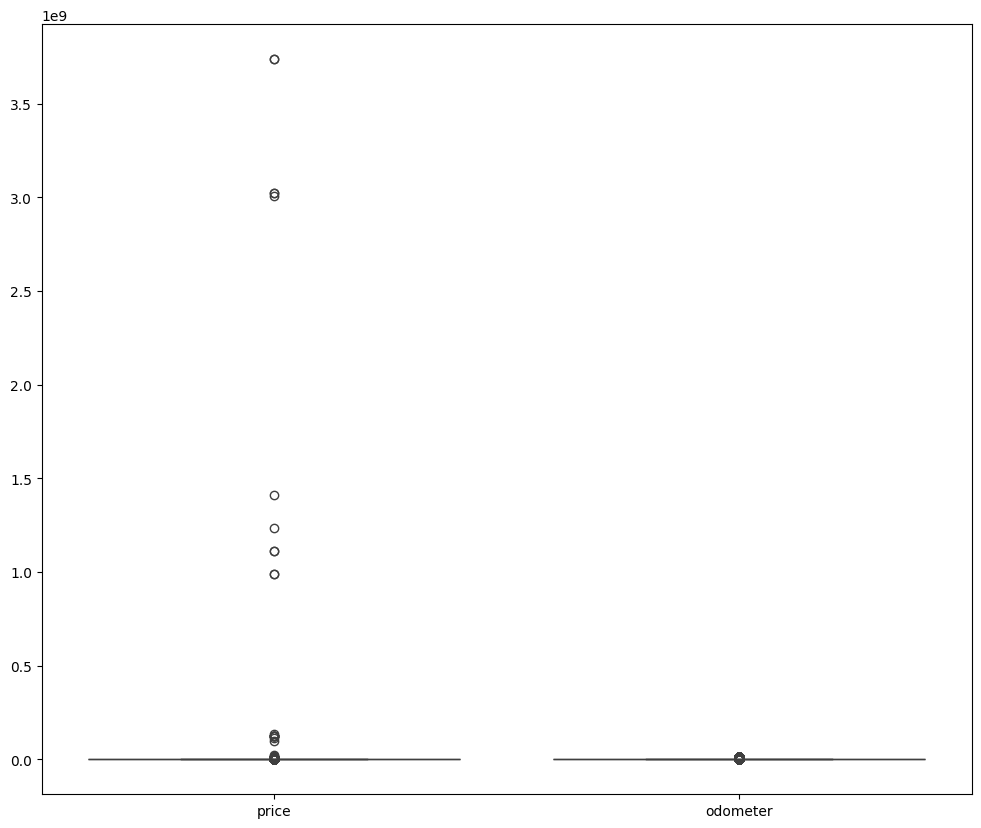

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
#Ahora haré gráficos para verificar los outliers
plt.figure(figsize = (12,10))
sns.boxplot(data = df[['price', 'odometer']])
plt.show()


In [159]:
#Puedo eliminar algunos outliers pero debo tener en cuenta que si elimino todos los de price, se eliminará por completo odometer (ya lo probé anteriormente)
#Ahora trataré posibles inconsistencias en los datos categóricos
fuel_unique = df['fuel'].unique()
print(fuel_unique)
transmision_unique = df['transmission'].unique()
print(transmision_unique)
drive_unique = df['drive'].unique()
print(drive_unique)

['desconocido' 'gas' 'other' 'diesel' 'hybrid' 'electric']
['desconocido' 'other' 'automatic' 'manual']
['desconocido' 'rwd' '4wd' 'fwd']


In [160]:
print(df.dtypes)

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object


In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#No encuentro inconsistencias
#Dividimos los datos en entrenamiento y prueba
X = df.drop(columns = ['price']) #Toma todos excepto el precio... Puedo tomar todos porque en teoría ya eliminé los irrelevantes
y = df['price'] #Esta es mi variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Divido las categorías en numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

#Ahora creo el pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Ahora creo el pipeline para las categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer', 'lat', 'long'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object'))]))])

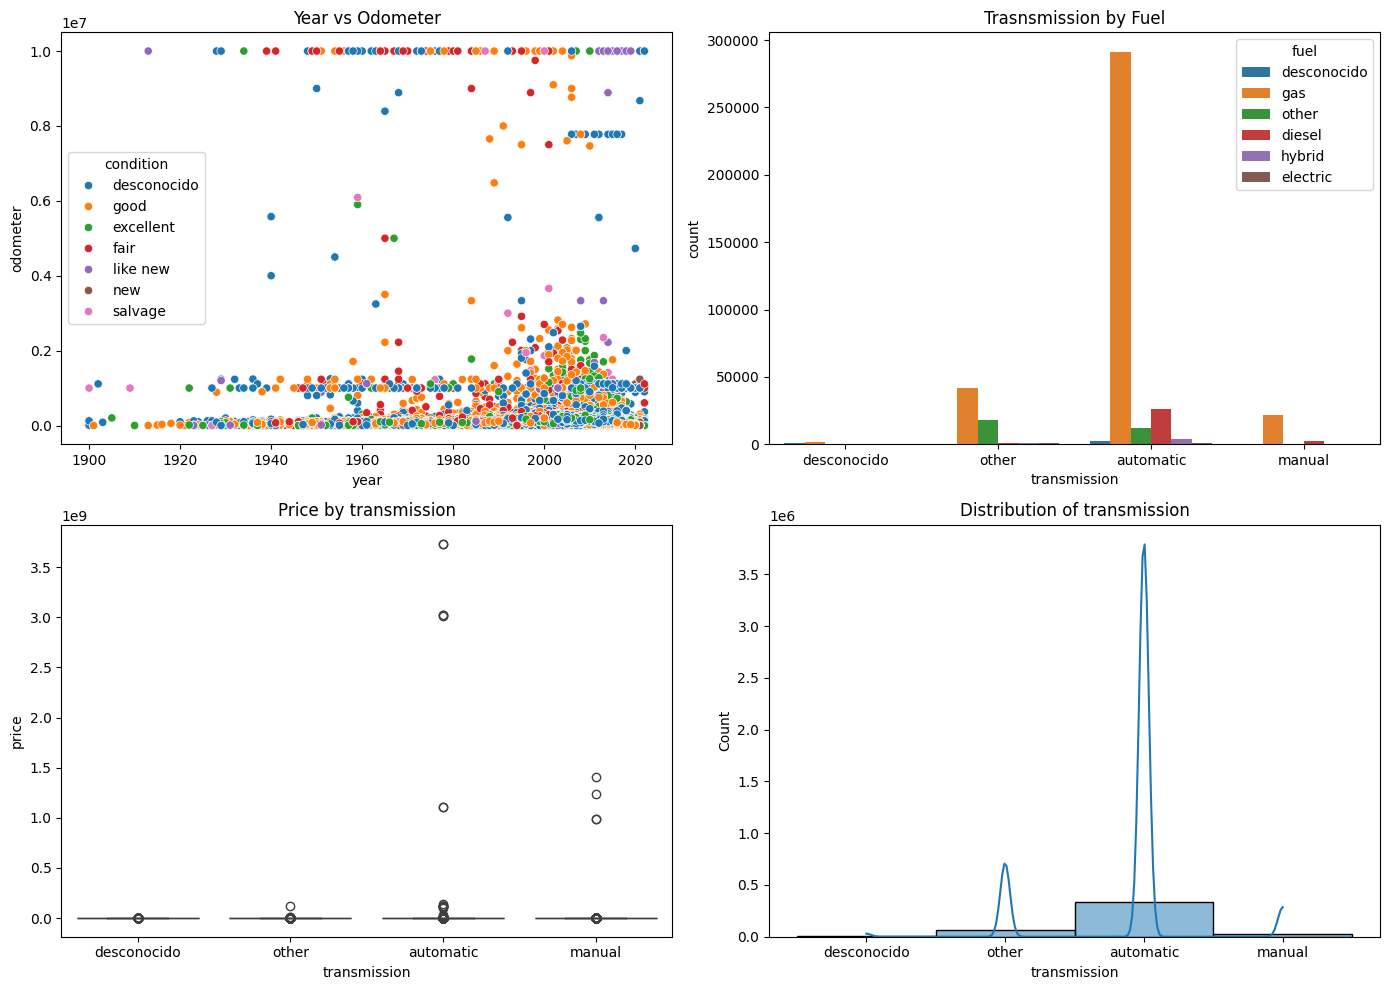

In [ ]:
#Ahora haré los gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot
sns.scatterplot(data=df, x='year', y='odometer', hue='condition', ax=axs[0, 0])
axs[0, 0].set_title('Year vs Odometer')

# Bar plot
sns.countplot(data=df, x='transmission', hue='fuel', ax=axs[0, 1])
axs[0, 1].set_title('Trasnsmission by Fuel')

# Box plot
sns.boxplot(data=df, x='transmission', y='price', ax=axs[1, 0])
axs[1, 0].set_title('Price by transmission')

# Hist plot
sns.histplot(data=df, x='transmission', bins=10, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of transmission')

# Ajustar la posición de los subplots para evitar superposición
plt.tight_layout()
plt.show()



In [ ]:
#Podemos quitar las siguientes conclusiones
#En el primer gráfico podemos ver que a partir del año 2000, muchos autos tienen un odómetro bajo, esto sugiere que son vehículos nuevos o bien mantenidos.
#En el segundo gráfico vemos que la transmisión automática es la que predomina para vehículos de combustible 'gas'. Los vehículos eléctricos o híbridos, tienen mayormente transmisión
#automática.
#En el tercer gráfico podemos ver que las transmisiones automáticas tienen los precios más altos y también parece que tienen una mayor variabilidad.
#Con el cuato gráfico nos damos cuenta que la transmisión automática es la más común en el dataset

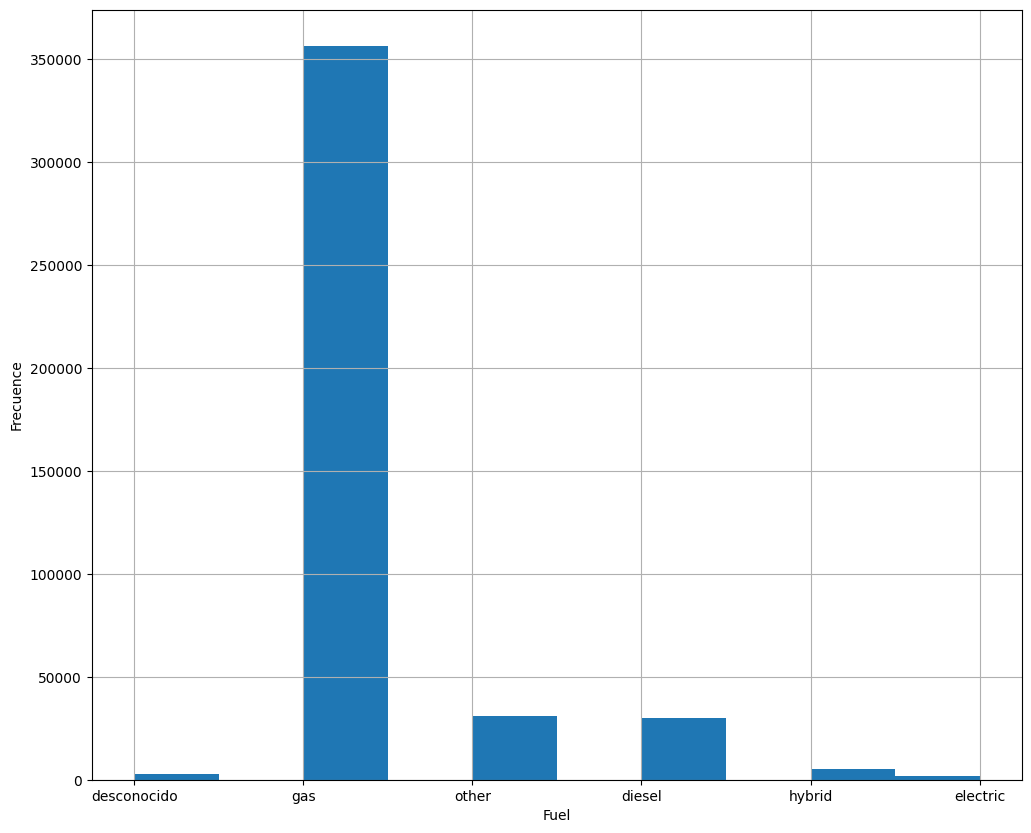

In [172]:
#Haré un univariado más
plt.figure(figsize = (12, 10))
plt.hist(df['fuel'], bins = 10)
plt.xlabel('Fuel')
plt.ylabel('Frecuence')
plt.grid(True)
plt.show()

In [174]:
#Con esto me aseguro que el combustible 'gas' es el predominante
#Características descriptivas
print(df.describe())

              price           year      odometer            lat           long
count  4.268800e+05  426880.000000  4.268800e+05  426880.000000  426880.000000
mean   7.519903e+04    2011.240173  9.791454e+04      38.504007     -94.651702
std    1.218228e+07       9.439234  2.127801e+05       5.797112      18.240566
min    0.000000e+00    1900.000000  0.000000e+00     -84.122245    -159.827728
25%    5.900000e+03    2008.000000  3.813000e+04      34.757016    -111.907973
50%    1.395000e+04    2013.000000  8.554800e+04      39.150100     -88.432600
75%    2.648575e+04    2017.000000  1.330000e+05      42.350000     -81.030000
max    3.736929e+09    2022.000000  1.000000e+07      82.390818     173.885502


In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Hagamos los modelos predictivos
#linear regr
linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')



Error Cuadrático Medio: 392787196079253.75
R-cuadrado: -0.0033871252786599193
Error Cuadrático Medio: 411990826340191.25
R-cuadrado: -0.05244339685465205


In [178]:
#Ahora voy a optimizar con GridSearchCV
from sklearn.model_selection import GridSearchCV

#defino el pipeline para random forest con preprocesamiento
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

#Defino el rango de los hiperparámetros para GridSearch
param_grid_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [10, 20],
}

#Configuro el GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid = param_grid_rf, cv = 5, scoring='neg_mean_squared_error')

#Entreno el GridSearchCV
grid_search_rf.fit(X_train, y_train)

print(f'Los mejores hiperparámetros para RandomForestRegressor: {grid_search_rf.best_params_}')
print(f'El mejor Puntaje MSE (Negativo): {-grid_search_rf.best_score_}')

#Evaluo en el conjunto de prueba
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

#Calculo las métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Error Cuadrático Medio (MSE): {mse_rf:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.2f}')
print(f'R-cuadrado (R²): {r2_rf:.2f}')


KeyboardInterrupt: 